In [1]:
from deeprobust.graph.data import Dataset
from deeprobust.graph.defense import GCN
from deeprobust.graph.global_attack import Metattack
from deeprobust.graph.utils import preprocess, normalize_adj_tensor
import torch.optim as optim
import torch.nn.functional as F
from utils import *
from torch_geometric.utils import dense_to_sparse
from torch_geometric.nn.models import GAT

In [2]:
#If missing imports, clone https://github.com/ChandlerBang/pytorch-gnn-meta-attack?tab=readme-ov-file

In [3]:
import sys
import argparse

sys.argv = [
    'notebook',
    '--seed', '15',
    '--epochs', '100',
    '--lr', '0.01',
    '--hidden', '16',
]

# Now use argparse as usual
parser = argparse.ArgumentParser()
parser.add_argument('--seed', type=int, default=15, help='Random seed.')
parser.add_argument('--epochs', type=int, default=100, help='Number of epochs to train.')
parser.add_argument('--lr', type=float, default=0.01, help='Initial learning rate.')
parser.add_argument('--hidden', type=int, default=16, help='Number of hidden units.')

args = parser.parse_args()
device = 'cpu'
print(args)

Namespace(seed=15, epochs=100, lr=0.01, hidden=16)


In [4]:
data = Dataset(root='/tmp/', name='cora')
adj, features, labels = data.adj, data.features, data.labels
adj, features, labels = preprocess(adj, features, labels, preprocess_adj=False)
idx_train, idx_val, idx_test = data.idx_train, data.idx_val, data.idx_test
idx_unlabeled = np.union1d(idx_val, idx_test)
idx_unlabeled = np.union1d(idx_val, idx_test)

Loading cora dataset...
Selecting 1 largest connected components


In [5]:
surrogate = GCN(nfeat=features.shape[1], nclass=labels.max().item()+1,
                nhid=16, dropout=0, with_relu=False, with_bias=False, device='cpu').to('cpu')
surrogate.fit(features, adj, labels, idx_train, idx_val, patience=30)
model = Metattack(surrogate, nnodes=adj.shape[0], feature_shape=features.shape,
        attack_structure=True, attack_features=True, device='cpu', lambda_=0).to('cpu')
model.attack(features, adj, labels, idx_train, idx_unlabeled, n_perturbations=100, ll_constraint=False)
modified_adj = model.modified_adj

Perturbing graph:   0%|                                 | 0/100 [00:00<?, ?it/s]

GCN loss on unlabled data: 0.5512551665306091
GCN acc on unlabled data: 0.8533750558784086
attack loss: 0.3033529818058014


Perturbing graph:   1%|▎                        | 1/100 [00:21<35:15, 21.37s/it]

GCN loss on unlabled data: 0.5628827214241028
GCN acc on unlabled data: 0.851586946803755
attack loss: 0.3190400302410126


Perturbing graph:   2%|▌                        | 2/100 [00:43<35:31, 21.75s/it]

GCN loss on unlabled data: 0.5494763255119324
GCN acc on unlabled data: 0.8520339740724184
attack loss: 0.34519603848457336


Perturbing graph:   3%|▊                        | 3/100 [01:06<35:50, 22.17s/it]

GCN loss on unlabled data: 0.5526992082595825
GCN acc on unlabled data: 0.8520339740724184
attack loss: 0.33382856845855713


Perturbing graph:   4%|█                        | 4/100 [01:28<35:39, 22.28s/it]

GCN loss on unlabled data: 0.5628889799118042
GCN acc on unlabled data: 0.8484577559231113
attack loss: 0.3704691231250763


Perturbing graph:   5%|█▎                       | 5/100 [01:51<35:25, 22.37s/it]

GCN loss on unlabled data: 0.5344670414924622
GCN acc on unlabled data: 0.8578453285650425
attack loss: 0.3438534438610077


Perturbing graph:   6%|█▌                       | 6/100 [02:14<35:25, 22.62s/it]

GCN loss on unlabled data: 0.5646927356719971
GCN acc on unlabled data: 0.8497988377291015
attack loss: 0.3277953863143921


Perturbing graph:   7%|█▊                       | 7/100 [02:37<35:20, 22.80s/it]

GCN loss on unlabled data: 0.573273241519928
GCN acc on unlabled data: 0.8471166741171211
attack loss: 0.3690502345561981


Perturbing graph:   8%|██                       | 8/100 [02:59<34:40, 22.61s/it]

GCN loss on unlabled data: 0.6027886867523193
GCN acc on unlabled data: 0.8462226195797944
attack loss: 0.35457462072372437


Perturbing graph:   9%|██▎                      | 9/100 [03:22<34:25, 22.70s/it]

GCN loss on unlabled data: 0.6010683178901672
GCN acc on unlabled data: 0.8390701832811801
attack loss: 0.3855699896812439


Perturbing graph:  10%|██▍                     | 10/100 [03:45<34:00, 22.68s/it]

GCN loss on unlabled data: 0.568370521068573
GCN acc on unlabled data: 0.8475637013857845
attack loss: 0.35954728722572327


Perturbing graph:  11%|██▋                     | 11/100 [04:08<33:46, 22.77s/it]

GCN loss on unlabled data: 0.6145573258399963
GCN acc on unlabled data: 0.8390701832811801
attack loss: 0.41355010867118835


Perturbing graph:  12%|██▉                     | 12/100 [04:31<33:32, 22.87s/it]

GCN loss on unlabled data: 0.6091129779815674
GCN acc on unlabled data: 0.8408582923558338
attack loss: 0.3946256935596466


Perturbing graph:  13%|███                     | 13/100 [04:53<32:49, 22.64s/it]

GCN loss on unlabled data: 0.6075499653816223
GCN acc on unlabled data: 0.8426464014304873
attack loss: 0.4095766544342041


Perturbing graph:  14%|███▎                    | 14/100 [05:15<32:23, 22.59s/it]

GCN loss on unlabled data: 0.5850657820701599
GCN acc on unlabled data: 0.8390701832811801
attack loss: 0.3742644488811493


Perturbing graph:  15%|███▌                    | 15/100 [05:38<31:53, 22.51s/it]

GCN loss on unlabled data: 0.572401225566864
GCN acc on unlabled data: 0.8386231560125168
attack loss: 0.40938708186149597


Perturbing graph:  16%|███▊                    | 16/100 [05:59<31:14, 22.31s/it]

GCN loss on unlabled data: 0.6040974259376526
GCN acc on unlabled data: 0.8417523468931605
attack loss: 0.3973320722579956


Perturbing graph:  17%|████                    | 17/100 [06:22<30:50, 22.30s/it]

GCN loss on unlabled data: 0.605332612991333
GCN acc on unlabled data: 0.8381761287438534
attack loss: 0.3918043375015259


Perturbing graph:  18%|████▎                   | 18/100 [06:44<30:34, 22.37s/it]

GCN loss on unlabled data: 0.6380968689918518
GCN acc on unlabled data: 0.829682610639249
attack loss: 0.4429900646209717


Perturbing graph:  19%|████▌                   | 19/100 [07:08<30:43, 22.76s/it]

GCN loss on unlabled data: 0.6425262689590454
GCN acc on unlabled data: 0.8314707197139025
attack loss: 0.4469994306564331


Perturbing graph:  20%|████▊                   | 20/100 [07:29<29:53, 22.42s/it]

GCN loss on unlabled data: 0.6351603269577026
GCN acc on unlabled data: 0.8381761287438534
attack loss: 0.4419766068458557


Perturbing graph:  21%|█████                   | 21/100 [07:51<29:10, 22.16s/it]

GCN loss on unlabled data: 0.5991038084030151
GCN acc on unlabled data: 0.8399642378185069
attack loss: 0.4133014678955078


Perturbing graph:  22%|█████▎                  | 22/100 [08:13<28:34, 21.98s/it]

GCN loss on unlabled data: 0.619140088558197
GCN acc on unlabled data: 0.8359409924005364
attack loss: 0.41806310415267944


Perturbing graph:  23%|█████▌                  | 23/100 [08:34<27:59, 21.82s/it]

GCN loss on unlabled data: 0.6648439168930054
GCN acc on unlabled data: 0.8283415288332588
attack loss: 0.49533611536026


Perturbing graph:  24%|█████▊                  | 24/100 [08:56<27:31, 21.73s/it]

GCN loss on unlabled data: 0.6043040752410889
GCN acc on unlabled data: 0.8390701832811801
attack loss: 0.4514940679073334


Perturbing graph:  25%|██████                  | 25/100 [09:17<27:10, 21.74s/it]

GCN loss on unlabled data: 0.6443125009536743
GCN acc on unlabled data: 0.8301296379079124
attack loss: 0.43241485953330994


Perturbing graph:  26%|██████▏                 | 26/100 [09:39<26:42, 21.65s/it]

GCN loss on unlabled data: 0.628671407699585
GCN acc on unlabled data: 0.8372820742065266
attack loss: 0.45262324810028076


Perturbing graph:  27%|██████▍                 | 27/100 [10:01<26:28, 21.76s/it]

GCN loss on unlabled data: 0.654060959815979
GCN acc on unlabled data: 0.8372820742065266
attack loss: 0.4897069036960602


Perturbing graph:  28%|██████▋                 | 28/100 [10:22<26:03, 21.71s/it]

GCN loss on unlabled data: 0.6890825629234314
GCN acc on unlabled data: 0.8247653106839518
attack loss: 0.48309099674224854


Perturbing graph:  29%|██████▉                 | 29/100 [10:44<25:38, 21.67s/it]

GCN loss on unlabled data: 0.6648750305175781
GCN acc on unlabled data: 0.8207420652659813
attack loss: 0.4782804846763611


Perturbing graph:  30%|███████▏                | 30/100 [11:06<25:19, 21.71s/it]

GCN loss on unlabled data: 0.6485023498535156
GCN acc on unlabled data: 0.8278945015645954
attack loss: 0.4701559543609619


Perturbing graph:  31%|███████▍                | 31/100 [11:27<24:53, 21.65s/it]

GCN loss on unlabled data: 0.6773490905761719
GCN acc on unlabled data: 0.8261063924899419
attack loss: 0.508836030960083


Perturbing graph:  32%|███████▋                | 32/100 [11:49<24:34, 21.69s/it]

GCN loss on unlabled data: 0.6602308750152588
GCN acc on unlabled data: 0.8287885561019223
attack loss: 0.49312183260917664


Perturbing graph:  33%|███████▉                | 33/100 [12:11<24:09, 21.64s/it]

GCN loss on unlabled data: 0.6622576713562012
GCN acc on unlabled data: 0.8261063924899419
attack loss: 0.47859230637550354


Perturbing graph:  34%|████████▏               | 34/100 [12:32<23:45, 21.60s/it]

GCN loss on unlabled data: 0.6770281195640564
GCN acc on unlabled data: 0.8323647742512293
attack loss: 0.5008470416069031


Perturbing graph:  35%|████████▍               | 35/100 [12:54<23:21, 21.57s/it]

GCN loss on unlabled data: 0.6742794513702393
GCN acc on unlabled data: 0.8256593652212785
attack loss: 0.47873541712760925


Perturbing graph:  36%|████████▋               | 36/100 [13:16<23:07, 21.68s/it]

GCN loss on unlabled data: 0.6860513687133789
GCN acc on unlabled data: 0.8220831470719714
attack loss: 0.5310071110725403


Perturbing graph:  37%|████████▉               | 37/100 [13:37<22:43, 21.65s/it]

GCN loss on unlabled data: 0.6538568139076233
GCN acc on unlabled data: 0.8319177469825659
attack loss: 0.5082624554634094


Perturbing graph:  38%|█████████               | 38/100 [13:59<22:20, 21.63s/it]

GCN loss on unlabled data: 0.7055704593658447
GCN acc on unlabled data: 0.8261063924899419
attack loss: 0.5591985583305359


Perturbing graph:  39%|█████████▎              | 39/100 [14:20<21:57, 21.61s/it]

GCN loss on unlabled data: 0.7201189398765564
GCN acc on unlabled data: 0.8091193562807332
attack loss: 0.5505044460296631


Perturbing graph:  40%|█████████▌              | 40/100 [14:42<21:35, 21.59s/it]

GCN loss on unlabled data: 0.6697074770927429
GCN acc on unlabled data: 0.8305766651765758
attack loss: 0.5055767893791199


Perturbing graph:  41%|█████████▊              | 41/100 [15:04<21:22, 21.73s/it]

GCN loss on unlabled data: 0.6738466024398804
GCN acc on unlabled data: 0.8234242288779615
attack loss: 0.5056285858154297


Perturbing graph:  42%|██████████              | 42/100 [15:26<21:00, 21.73s/it]

GCN loss on unlabled data: 0.7041482925415039
GCN acc on unlabled data: 0.8207420652659813
attack loss: 0.5595563054084778


Perturbing graph:  43%|██████████▎             | 43/100 [15:47<20:39, 21.75s/it]

GCN loss on unlabled data: 0.7247970104217529
GCN acc on unlabled data: 0.8189539561913277
attack loss: 0.5685433149337769


Perturbing graph:  44%|██████████▌             | 44/100 [16:09<20:17, 21.74s/it]

GCN loss on unlabled data: 0.654148519039154
GCN acc on unlabled data: 0.8234242288779615
attack loss: 0.5088388919830322


Perturbing graph:  45%|██████████▊             | 45/100 [16:31<19:54, 21.71s/it]

GCN loss on unlabled data: 0.7101553082466125
GCN acc on unlabled data: 0.8211890925346446
attack loss: 0.5802528262138367


Perturbing graph:  46%|███████████             | 46/100 [16:52<19:31, 21.70s/it]

GCN loss on unlabled data: 0.7088814973831177
GCN acc on unlabled data: 0.8189539561913277
attack loss: 0.5591737031936646


Perturbing graph:  47%|███████████▎            | 47/100 [17:15<19:19, 21.88s/it]

GCN loss on unlabled data: 0.6916553378105164
GCN acc on unlabled data: 0.8167188198480108
attack loss: 0.5356552004814148


Perturbing graph:  48%|███████████▌            | 48/100 [17:36<18:54, 21.81s/it]

GCN loss on unlabled data: 0.7151259779930115
GCN acc on unlabled data: 0.8185069289226643
attack loss: 0.5747547149658203


Perturbing graph:  49%|███████████▊            | 49/100 [17:58<18:30, 21.77s/it]

GCN loss on unlabled data: 0.7503049969673157
GCN acc on unlabled data: 0.81135449262405
attack loss: 0.5962241291999817


Perturbing graph:  50%|████████████            | 50/100 [18:20<18:07, 21.76s/it]

GCN loss on unlabled data: 0.7537571787834167
GCN acc on unlabled data: 0.8068842199374162
attack loss: 0.583999752998352


Perturbing graph:  51%|████████████▏           | 51/100 [18:41<17:43, 21.71s/it]

GCN loss on unlabled data: 0.7512629628181458
GCN acc on unlabled data: 0.8131426016987037
attack loss: 0.6048447489738464


Perturbing graph:  52%|████████████▍           | 52/100 [19:03<17:25, 21.79s/it]

GCN loss on unlabled data: 0.729047417640686
GCN acc on unlabled data: 0.821636119803308
attack loss: 0.5843877196311951


Perturbing graph:  53%|████████████▋           | 53/100 [19:25<17:05, 21.82s/it]

GCN loss on unlabled data: 0.7401262521743774
GCN acc on unlabled data: 0.8149307107733572
attack loss: 0.5606318116188049


Perturbing graph:  54%|████████████▉           | 54/100 [19:47<16:41, 21.77s/it]

GCN loss on unlabled data: 0.738450288772583
GCN acc on unlabled data: 0.8202950379973178
attack loss: 0.5759274363517761


Perturbing graph:  55%|█████████████▏          | 55/100 [20:09<16:17, 21.73s/it]

GCN loss on unlabled data: 0.7404775619506836
GCN acc on unlabled data: 0.8109074653553867
attack loss: 0.5851842761039734


Perturbing graph:  56%|█████████████▍          | 56/100 [20:31<16:00, 21.82s/it]

GCN loss on unlabled data: 0.7389516830444336
GCN acc on unlabled data: 0.8211890925346446
attack loss: 0.5878592729568481


Perturbing graph:  57%|█████████████▋          | 57/100 [20:52<15:36, 21.79s/it]

GCN loss on unlabled data: 0.754700779914856
GCN acc on unlabled data: 0.8077782744747429
attack loss: 0.610718309879303


Perturbing graph:  58%|█████████████▉          | 58/100 [21:15<15:23, 21.98s/it]

GCN loss on unlabled data: 0.7255296111106873
GCN acc on unlabled data: 0.8100134108180599
attack loss: 0.5413358807563782


Perturbing graph:  59%|██████████████▏         | 59/100 [21:37<14:59, 21.95s/it]

GCN loss on unlabled data: 0.7302100658416748
GCN acc on unlabled data: 0.819400983459991
attack loss: 0.5965900421142578


Perturbing graph:  60%|██████████████▍         | 60/100 [21:58<14:34, 21.87s/it]

GCN loss on unlabled data: 0.7893452048301697
GCN acc on unlabled data: 0.8068842199374162
attack loss: 0.6359111070632935


Perturbing graph:  61%|██████████████▋         | 61/100 [22:24<14:55, 22.97s/it]

GCN loss on unlabled data: 0.7780202627182007
GCN acc on unlabled data: 0.8086723290120698
attack loss: 0.6103518009185791


Perturbing graph:  62%|██████████████▉         | 62/100 [22:48<14:41, 23.21s/it]

GCN loss on unlabled data: 0.7837039232254028
GCN acc on unlabled data: 0.8091193562807332
attack loss: 0.6348928809165955


Perturbing graph:  63%|███████████████         | 63/100 [23:10<14:11, 23.02s/it]

GCN loss on unlabled data: 0.7459712028503418
GCN acc on unlabled data: 0.8077782744747429
attack loss: 0.6054185032844543


Perturbing graph:  64%|███████████████▎        | 64/100 [23:32<13:40, 22.78s/it]

GCN loss on unlabled data: 0.7860100865364075
GCN acc on unlabled data: 0.805543138131426
attack loss: 0.6259996294975281


Perturbing graph:  65%|███████████████▌        | 65/100 [23:54<13:08, 22.54s/it]

GCN loss on unlabled data: 0.712373673915863
GCN acc on unlabled data: 0.8167188198480108
attack loss: 0.5921767950057983


Perturbing graph:  66%|███████████████▊        | 66/100 [24:16<12:38, 22.31s/it]

GCN loss on unlabled data: 0.7467995285987854
GCN acc on unlabled data: 0.8144836835046938
attack loss: 0.597324550151825


Perturbing graph:  67%|████████████████        | 67/100 [24:40<12:29, 22.72s/it]

GCN loss on unlabled data: 0.7582721710205078
GCN acc on unlabled data: 0.8126955744300403
attack loss: 0.6081556677818298


Perturbing graph:  68%|████████████████▎       | 68/100 [25:08<13:00, 24.38s/it]

GCN loss on unlabled data: 0.770308792591095
GCN acc on unlabled data: 0.8140366562360304
attack loss: 0.631103515625


Perturbing graph:  69%|████████████████▌       | 69/100 [25:34<12:53, 24.95s/it]

GCN loss on unlabled data: 0.7884484529495239
GCN acc on unlabled data: 0.8037550290567724
attack loss: 0.6231310367584229


Perturbing graph:  70%|████████████████▊       | 70/100 [26:04<13:07, 26.25s/it]

GCN loss on unlabled data: 0.7645500302314758
GCN acc on unlabled data: 0.8059901654000894
attack loss: 0.6275394558906555


Perturbing graph:  71%|█████████████████       | 71/100 [26:25<12:03, 24.95s/it]

GCN loss on unlabled data: 0.7450720071792603
GCN acc on unlabled data: 0.8104604380867233
attack loss: 0.5926784873008728


Perturbing graph:  72%|█████████████████▎      | 72/100 [26:50<11:34, 24.80s/it]

GCN loss on unlabled data: 0.7931267023086548
GCN acc on unlabled data: 0.8176128743853375
attack loss: 0.6578679084777832


Perturbing graph:  73%|█████████████████▌      | 73/100 [27:12<10:50, 24.11s/it]

GCN loss on unlabled data: 0.7756724953651428
GCN acc on unlabled data: 0.8126955744300403
attack loss: 0.6365638971328735


Perturbing graph:  74%|█████████████████▊      | 74/100 [27:34<10:08, 23.42s/it]

GCN loss on unlabled data: 0.7498790621757507
GCN acc on unlabled data: 0.8118015198927134
attack loss: 0.6246716380119324


Perturbing graph:  75%|██████████████████      | 75/100 [27:56<09:33, 22.95s/it]

GCN loss on unlabled data: 0.7894141674041748
GCN acc on unlabled data: 0.81135449262405
attack loss: 0.6652183532714844


Perturbing graph:  76%|██████████████████▏     | 76/100 [28:18<09:02, 22.60s/it]

GCN loss on unlabled data: 0.8081783056259155
GCN acc on unlabled data: 0.8073312472060795
attack loss: 0.6537394523620605


Perturbing graph:  77%|██████████████████▍     | 77/100 [28:40<08:33, 22.33s/it]

GCN loss on unlabled data: 0.822175145149231
GCN acc on unlabled data: 0.8140366562360304
attack loss: 0.6657742261886597


Perturbing graph:  78%|██████████████████▋     | 78/100 [29:01<08:08, 22.19s/it]

GCN loss on unlabled data: 0.8019694089889526
GCN acc on unlabled data: 0.8042020563254358
attack loss: 0.6609028577804565


Perturbing graph:  79%|██████████████████▉     | 79/100 [29:24<07:45, 22.17s/it]

GCN loss on unlabled data: 0.7566409707069397
GCN acc on unlabled data: 0.8100134108180599
attack loss: 0.6355218291282654


Perturbing graph:  80%|███████████████████▏    | 80/100 [29:45<07:21, 22.06s/it]

GCN loss on unlabled data: 0.8183971047401428
GCN acc on unlabled data: 0.8010728654447922
attack loss: 0.6876953840255737


Perturbing graph:  81%|███████████████████▍    | 81/100 [30:07<06:58, 22.03s/it]

GCN loss on unlabled data: 0.8343294262886047
GCN acc on unlabled data: 0.8006258381761288
attack loss: 0.6994044184684753


Perturbing graph:  82%|███████████████████▋    | 82/100 [30:30<06:42, 22.36s/it]

GCN loss on unlabled data: 0.7910239696502686
GCN acc on unlabled data: 0.8037550290567724
attack loss: 0.6608598828315735


Perturbing graph:  83%|███████████████████▉    | 83/100 [30:53<06:21, 22.42s/it]

GCN loss on unlabled data: 0.8591755628585815
GCN acc on unlabled data: 0.7957085382208314
attack loss: 0.7231448292732239


Perturbing graph:  84%|████████████████████▏   | 84/100 [31:18<06:10, 23.15s/it]

GCN loss on unlabled data: 0.8240214586257935
GCN acc on unlabled data: 0.8046490835940993
attack loss: 0.693856418132782


Perturbing graph:  85%|████████████████████▍   | 85/100 [31:40<05:43, 22.91s/it]

GCN loss on unlabled data: 0.8221176266670227
GCN acc on unlabled data: 0.8019669199821189
attack loss: 0.6907541155815125


Perturbing graph:  86%|████████████████████▋   | 86/100 [32:04<05:23, 23.08s/it]

GCN loss on unlabled data: 0.8359056115150452
GCN acc on unlabled data: 0.8046490835940993
attack loss: 0.710349977016449


Perturbing graph:  87%|████████████████████▉   | 87/100 [32:27<04:59, 23.02s/it]

GCN loss on unlabled data: 0.8375189900398254
GCN acc on unlabled data: 0.8086723290120698
attack loss: 0.7164555191993713


Perturbing graph:  88%|█████████████████████   | 88/100 [32:50<04:35, 23.00s/it]

GCN loss on unlabled data: 0.8290777206420898
GCN acc on unlabled data: 0.7997317836388019
attack loss: 0.7144869565963745


Perturbing graph:  89%|█████████████████████▎  | 89/100 [33:13<04:15, 23.19s/it]

GCN loss on unlabled data: 0.8172162771224976
GCN acc on unlabled data: 0.8046490835940993
attack loss: 0.7030983567237854


Perturbing graph:  90%|█████████████████████▌  | 90/100 [33:37<03:55, 23.52s/it]

GCN loss on unlabled data: 0.8273692727088928
GCN acc on unlabled data: 0.8073312472060795
attack loss: 0.7308729290962219


Perturbing graph:  91%|█████████████████████▊  | 91/100 [34:00<03:29, 23.30s/it]

GCN loss on unlabled data: 0.7595527172088623
GCN acc on unlabled data: 0.8073312472060795
attack loss: 0.6415536403656006


Perturbing graph:  92%|██████████████████████  | 92/100 [34:23<03:06, 23.29s/it]

GCN loss on unlabled data: 0.8284638524055481
GCN acc on unlabled data: 0.8010728654447922
attack loss: 0.7064993977546692


Perturbing graph:  93%|██████████████████████▎ | 93/100 [34:46<02:40, 22.96s/it]

GCN loss on unlabled data: 0.8202655911445618
GCN acc on unlabled data: 0.7988377291014752
attack loss: 0.6733136177062988


Perturbing graph:  94%|██████████████████████▌ | 94/100 [35:08<02:16, 22.75s/it]

GCN loss on unlabled data: 0.8483209013938904
GCN acc on unlabled data: 0.8073312472060795
attack loss: 0.7134976387023926


Perturbing graph:  95%|██████████████████████▊ | 95/100 [35:30<01:52, 22.49s/it]

GCN loss on unlabled data: 0.8017022609710693
GCN acc on unlabled data: 0.8050961108627627
attack loss: 0.6715494990348816


Perturbing graph:  96%|███████████████████████ | 96/100 [35:53<01:30, 22.72s/it]

GCN loss on unlabled data: 0.8571302890777588
GCN acc on unlabled data: 0.7970496200268217
attack loss: 0.7348571419715881


Perturbing graph:  97%|███████████████████████▎| 97/100 [36:17<01:08, 22.99s/it]

GCN loss on unlabled data: 0.8420041799545288
GCN acc on unlabled data: 0.797496647295485
attack loss: 0.7157319188117981


Perturbing graph:  98%|███████████████████████▌| 98/100 [36:39<00:45, 22.87s/it]

GCN loss on unlabled data: 0.8388984203338623
GCN acc on unlabled data: 0.8015198927134555
attack loss: 0.7440044283866882


Perturbing graph:  99%|███████████████████████▊| 99/100 [37:02<00:22, 22.95s/it]

GCN loss on unlabled data: 0.8518236875534058
GCN acc on unlabled data: 0.7957085382208314
attack loss: 0.7264821529388428


Perturbing graph: 100%|███████████████████████| 100/100 [37:25<00:00, 22.46s/it]


In [6]:
# todo: fix modularity

In [7]:
def test_gcn(adj):
    adj = normalize_adj_tensor(adj)
    gcn = GCN(nfeat=features.shape[1],
              nhid=args.hidden,
              nclass=labels.max().item() + 1,
              dropout=0.5,
              device='cpu')

    if device != 'cpu':
        gcn = gcn.to(device)

    optimizer = optim.Adam(gcn.parameters(),
                           lr=args.lr, weight_decay=5e-4)

    gcn.train()

    for epoch in range(args.epochs):
        optimizer.zero_grad()
        output = gcn(features, adj)
        loss_train = F.nll_loss(output[idx_train], labels[idx_train])
        acc_train = accuracy(output[idx_train], labels[idx_train])
        loss_train.backward()
        optimizer.step()

    gcn.eval()
    output = gcn(features, adj)

    loss_test = F.nll_loss(output[idx_test], labels[idx_test])
    acc_test = accuracy(output[idx_test], labels[idx_test])
    #print("Test set results:",
    #       "loss= {:.4f}".format(loss_test.item()),
    #       "accuracy= {:.4f}".format(acc_test.item()))

    return acc_test.item()

In [8]:
def test_gat(adj):
    adj = normalize_adj_tensor(adj)
    edge_index, _ = dense_to_sparse(adj)
    device='cpu'
    edge_index = edge_index.to(device)

    gatv1 = GAT(
        in_channels=features.shape[1],
        num_layers=1,
        hidden_channels=args.hidden,
        out_channels=labels.max().item() + 1,
        dropout=0.5,
        heads=8
    ).to(device)

    optimizer = optim.Adam(gatv1.parameters(), lr=args.lr, weight_decay=5e-4)

    gatv1.train()

    for epoch in range(args.epochs):
        optimizer.zero_grad()
        output = F.log_softmax(gatv1(features, edge_index), dim=1)

        loss_train = F.nll_loss(output[idx_train], labels[idx_train])
        acc_train = accuracy(output[idx_train], labels[idx_train])
        loss_train.backward()
        torch.nn.utils.clip_grad_norm_(gatv1.parameters(), max_norm=1.0)
        optimizer.step()

    gatv1.eval()
    output = F.log_softmax(gatv1(features, edge_index), dim=1)

    loss_test = F.nll_loss(output[idx_test], labels[idx_test])
    acc_test = accuracy(output[idx_test], labels[idx_test])
    #print("Test set results:",
    #       "loss= {:.4f}".format(loss_test.item()),
    #       "accuracy= {:.4f}".format(acc_test.item()))

    return acc_test.item()

In [9]:
def test_gatv2(adj):
    adj = normalize_adj_tensor(adj)
    edge_index, _ = dense_to_sparse(adj)
    device='cpu'
    edge_index = edge_index.to(device)

    gatv2 = GAT(
        v2=True,
        in_channels=features.shape[1],
        num_layers=1,
        hidden_channels=args.hidden,
        out_channels=labels.max().item() + 1,
        dropout=0.5,
        heads=8
    ).to(device)

    optimizer = optim.Adam(gatv2.parameters(), lr=args.lr, weight_decay=5e-4)

    gatv2.train()

    for epoch in range(args.epochs):
        optimizer.zero_grad()
        output = F.log_softmax(gatv2(features, edge_index), dim=1)

        loss_train = F.nll_loss(output[idx_train], labels[idx_train])
        acc_train = accuracy(output[idx_train], labels[idx_train])
        loss_train.backward()
        torch.nn.utils.clip_grad_norm_(gatv2.parameters(), max_norm=1.0)
        optimizer.step()

    gatv2.eval()
    output = F.log_softmax(gatv2(features, edge_index), dim=1)

    loss_test = F.nll_loss(output[idx_test], labels[idx_test])
    acc_test = accuracy(output[idx_test], labels[idx_test])
    #print("Test set results:",
    #       "loss= {:.4f}".format(loss_test.item()),
    #       "accuracy= {:.4f}".format(acc_test.item()))

    return acc_test.item()


In [14]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

def test_and_visualize(adj, modified_adj, test_function, name):
    runs = 25
    clean_acc = []
    attacked_acc = []
   
    print(f'=== testing {name} on original(clean) graph ===')
    for i in range(runs):
        clean_acc.append(test_function(adj))

    print(f'=== testing {name} on attacked graph ===')
    for i in range(runs):
        attacked_acc.append(test_function(modified_adj))

    data = {
      'Accuracy Type': ['Acc. Clean'] * len(clean_acc) + ['Acc. Perturbed'] * len(attacked_acc),
      'Accuracy': clean_acc + attacked_acc
    }
    
    df = pd.DataFrame(data)

    plt.figure(figsize=(6, 6))
    sns.boxplot(x='Accuracy Type', y='Accuracy', data=df)

    plt.title("Accuracy before/after Mettack attack, {}".format(name))
    plt.show()

=== testing GCN on original(clean) graph ===
=== testing GCN on attacked graph ===


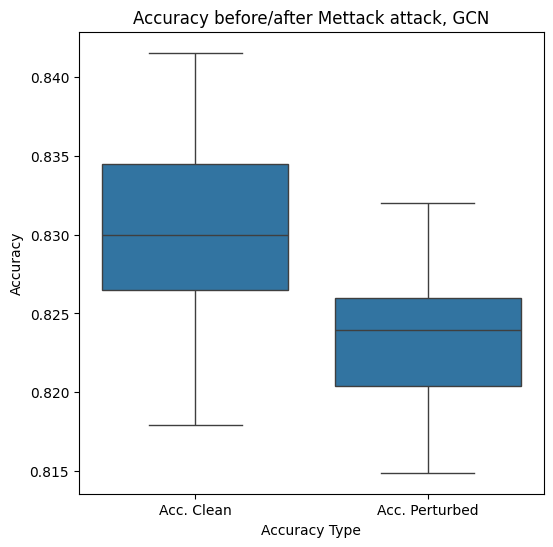

In [15]:
test_and_visualize(adj, modified_adj, test_gcn, "GCN")

=== testing GAT on original(clean) graph ===
=== testing GAT on attacked graph ===


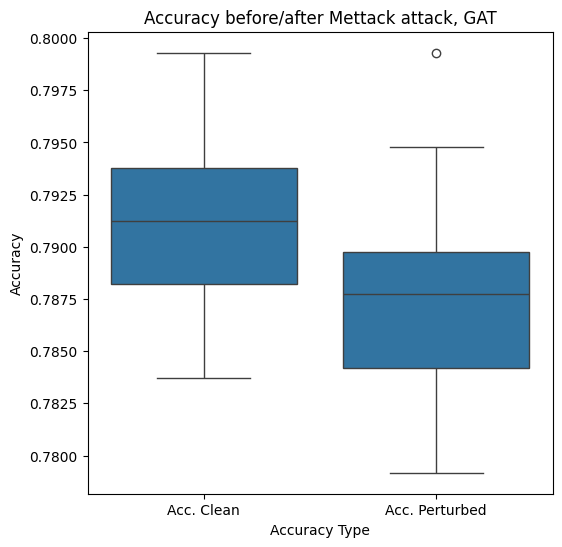

In [16]:
test_and_visualize(adj, modified_adj, test_gat, "GAT")

=== testing GATv2 on original(clean) graph ===
=== testing GATv2 on attacked graph ===


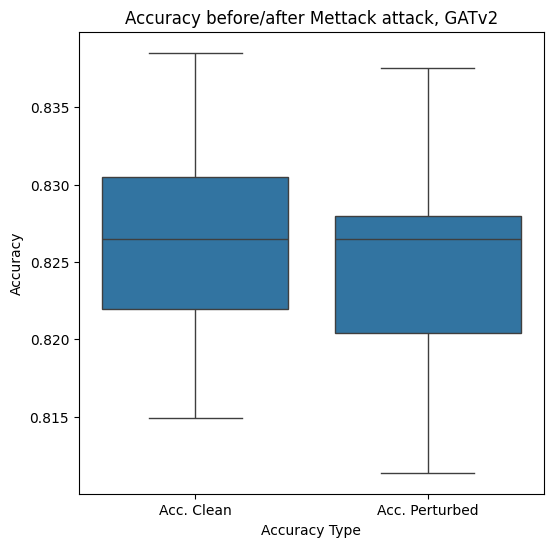

In [17]:
test_and_visualize(adj, modified_adj, test_gcn, "GATv2")